In [1]:
from xxsubtype import bench

cd ..

/home/murat/Software/MM_lab/artdep


/home/murat/anaconda3/envs/matmacore/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [12]:
%load_ext autoreload
%autoreload 2
import matmacore as mm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/media/ryank/ryan_data/github/artdep/matmacore/mol.py:104: SyntaxWarning: invalid escape sequence '\s'
  elif flags['read_geom'] == True and re.search('^\s*.\d', line):
/media/ryank/ryan_data/github/artdep/matmacore/mol.py:129: SyntaxWarning: invalid escape sequence '\s'
  elif flags['normal_mode'] == True and re.search('^\s*\d*\s*.\d*', line) and len(line.split()) > 3:
/media/ryank/ryan_data/github/artdep/matmacore/mol.py:148: SyntaxWarning: invalid escape sequence '\s'
  elif flags['read_geom'] == True and re.search('^\s*.\d', line):
/media/ryank/ryan_data/github/artdep/matmacore/mol.py:161: SyntaxWarning: invalid escape sequence '\s'
  elif flags['read_geom'] == True and re.search('^\s*.\d', line):
/media/ryank/ryan_data/github/artdep/matmacore/mol.py:171: SyntaxWarning: invalid escape sequence '\d'
  elif flags['jcoup_flag'] == True and re.search('-?\d\.\d+[Dd][+\-]\d\d?', line):
/media/ryank/ryan_data/github/artdep/matmacore/mol.py:184: SyntaxWarning: invalid escape sequence '\s'


In [13]:
cp2k_test = mm.Mol('benchmarks/sample_data')
cp2k_test.cp2k(file='cp2k_traj.xyz', colvar=[0, 2], timestep=0.5)

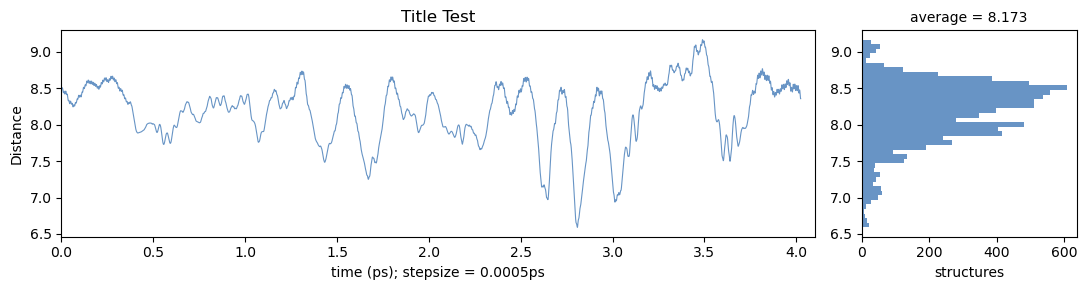

In [26]:
plot = mm.Plot()

labels = {
    'xlabel': None,
    'ylabel': 'Distance',
    'title': 'Title Test',
    'xrange': [0, 4.1]
}

plot.set_config(labels)

plot.cmap(color_num=2,offset=0,map='ice')
plot.trajectory(cp2k_test)



In [5]:
gromacs_test = mm.Mol('benchmarks/sample_data')
gromacs_test.gromacs(file='gromacs.xvg')

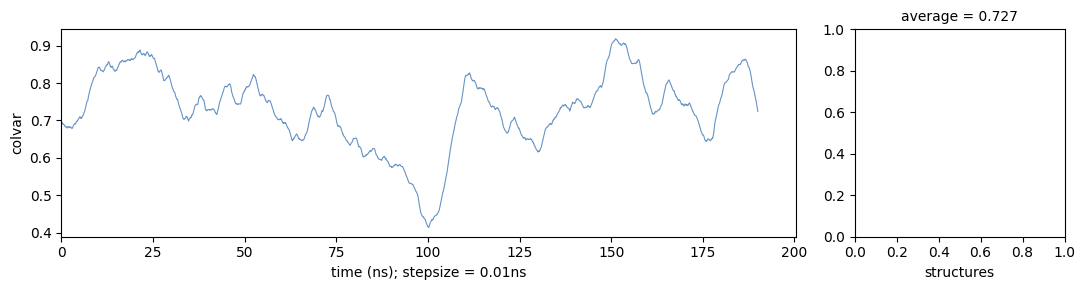

In [6]:
plot.trajectory(gromacs_test, average=1000)

In [7]:
mol1, mol2 = mm.Mol('benchmarks/sample_data'), mm.Mol('benchmarks/sample_data')
mol1.gromacs('multi_traj1.xvg')
mol2.gromacs('multi_traj2.xvg')

0.797
0.727


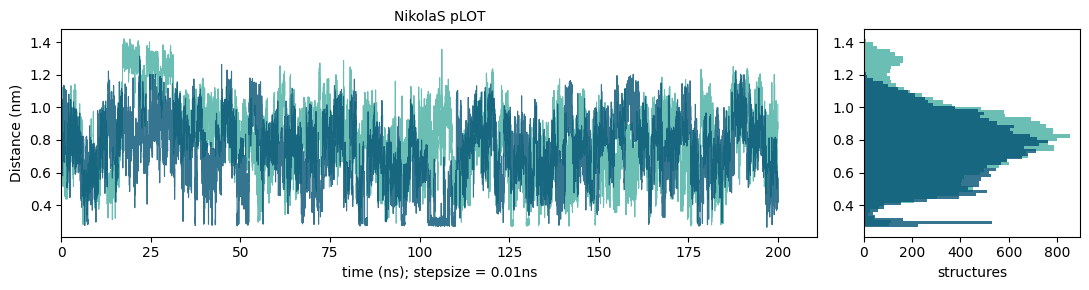

In [8]:
plot = mm.Plot()
plot.cmap(color_num=2,offset=0,map='bluyl')

plot.trajectory([mol1,mol2], hist=True, var_name='Distance (nm)', title='NikolaS pLOT')

0.797
0.797


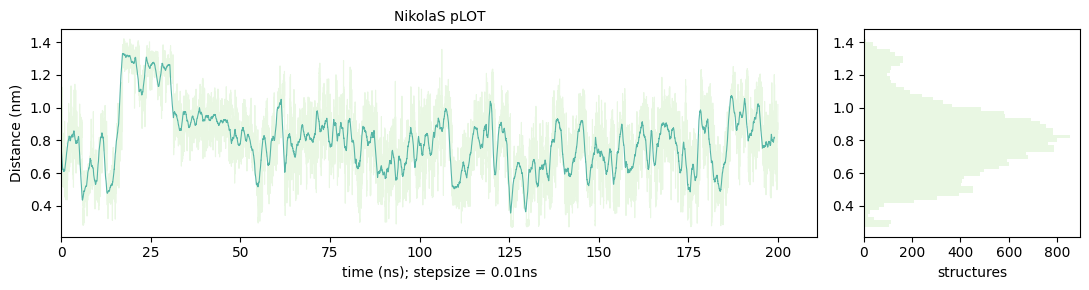

In [9]:
plot = mm.Plot()
plot.cmap(color_num=4,offset=0,map='bluyl')

plot.trajectory([mol1,mol1], hist=True, var_name='Distance (nm)', title='NikolaS pLOT', average=[0,100], alpha=[0.3, 0.9])

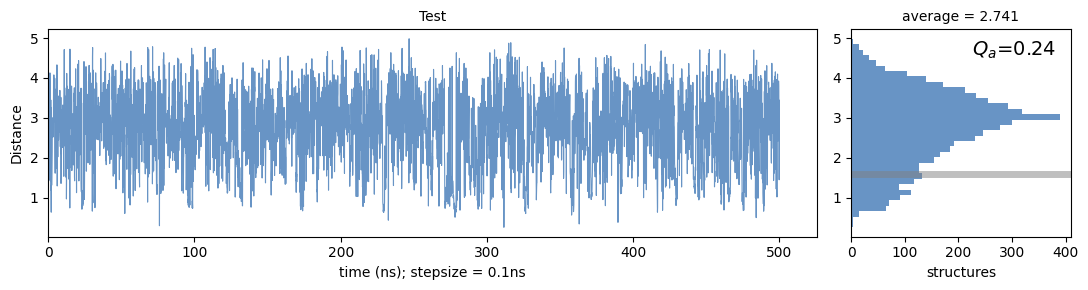

In [10]:
mol = mm.Mol('benchmarks/sample_data')
mol.gromacs('dist.xvg')

plot = mm.Plot()

plot.cmap(color_num=2,offset=0,map='ice')
plot.trajectory(mol, var_name='Distance', title='Test', calc_qa=True)

In [12]:
ls benchmarks/sample_data

ang_ring.xvg       fem_angles.xvg     leA3a1.dat       test_reaction/
cp2k_traj.xyz      gromacs.xvg        lys_00.xvg       WT_avg2_DH.xvg
D151A_avg3_AH.xvg  H189A_avg4_DA.xvg  multi_traj1.xvg
dist.xvg           input.log          multi_traj2.xvg


0.509
2.179
1.546


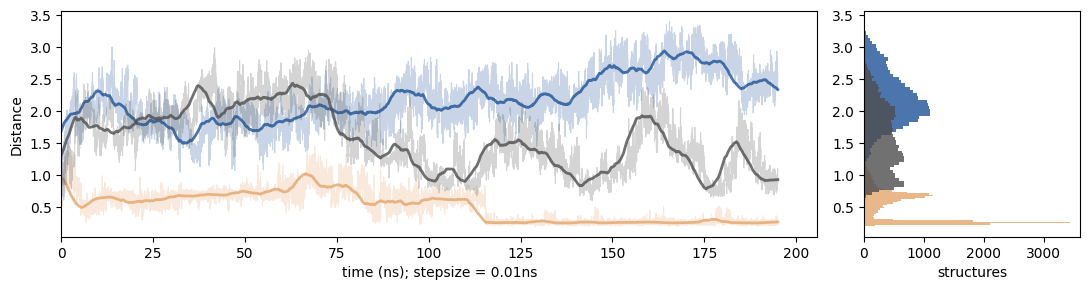

In [14]:
wt =  mm.Mol(path="benchmarks/sample_data")
wt.gromacs(file='WT_avg2_DH.xvg')
da = mm.Mol(path='benchmarks/sample_data')
da.gromacs(file='D151A_avg3_AH.xvg')
ha = mm.Mol(path='benchmarks/sample_data')
ha.gromacs(file='H189A_avg4_DA.xvg')
 
plt = mm.Plot()
plt.cmap(color_num=3, offset=0.1, map='accent')
ml = [wt,da,ha]
plt.trajectory(ml, var_name='Distance', average=500, overlap=True)
 
plt.savefig()
 